In [ ]:
#the statistics of the eclipse data

In [3]:
import pandas as pd
import os
import json
import csv
from flatten_json import flatten
import re, datetime
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
from lifelines import KaplanMeierFitter

In [4]:
def keepVal(activity):
    if activity=='NEW'or activity=='FIXED':
        return 1
    return 0

In [5]:
#keep only changes in status
def keep(value,status):
    if status!='Resolution':
        return 1
    if value=='---':
        return 0
    return 1



In [6]:
#return the activity
def return_val(x):
    if x['What']=='Status':
        if x['Added']=='ASSIGNED':
            return 'Assignee'
        return x['Added']
        
    if x['What']=='Assignee':
        return x['What']
    if x['What']=='Resolution':
        return x['Added']
    

In [7]:
df=pd.read_csv('db\\ECF.csv')

In [8]:
dfu=df
dfg=df

In [9]:

df['creation_ts'] = pd.to_datetime(df['creation_ts'])
df['When'] = pd.to_datetime(df['When'])

In [10]:
dict1={
  "4.2" : "2012-6-27 00:00:00" ,  
"4.3" : "2013-6-26 20:00:00" ,
"4.4" :  "2014-6-25 12:15:00" ,
"4.5" : "2015-6-24 20:00:00" ,
"4.6" :"2016-6-22 11:00:00",
"4.7" :  "2017-6-28 09:50:00",
"4.8" :  "2018-6-27 00:00:00"

}

In [11]:
arr=[
    "4.3" ,
"4.4" ,
"4.5" ,
"4.6"  ,
"4.7",
"4.8",
 "4.9"   
]
dates=[
    "26-6-2013 20:00:00" ,
 "25-6-2014 12:15:00" ,
 "24-6-2015 20:00:00" ,
"22-6-2016 11:00:00",
  "28-6-2017 09:50:00",
  "27-6-2018 00:00:00",
 "27-6-2019 00:00:00"
]
Bdates=[
    "22-6-2011 20:00:00" ,
    "27-6-2012 00:00:00",
    "26-6-2013 20:00:00" ,
 "25-6-2014 12:15:00" ,
 "24-6-2015 20:00:00" ,
"22-6-2016 11:00:00",
  "28-6-2017 09:50:00",
  "27-6-2018 00:00:00",
]

In [12]:
arr1=[
    4.2 ,
    4.3 ,
4.4 ,
4.5 ,
4.6  ,
4.7,
4.8 
]

In [15]:
#resolved before
tData=pd.DataFrame()
id_before_release=0
id_after_release=0
id_RBRB=0
id_RBFB=0
id_RBRA=0
id_RBFA=0
id_RARA=0
id_RAFA=0
c=0
for x in dict1:
    data=pd.DataFrame()
    data1=pd.DataFrame()
    #print(dict[x])
    start_date = dict1[x]
    end_date = Bdates[c]
    versionD= x
    version='^'+versionD
    date_time_obj = datetime.datetime.strptime(end_date, '%d-%m-%Y %H:%M:%S')
    c=c+1
    rem=[0]
    for i in range(12):
        
            k=date_time_obj + timedelta(30*i)
            l=date_time_obj + timedelta(30*(i+1))
           
 
            #the bug reported in this month
            mask = (df.version.str.contains(version, regex=True))  & (df['creation_ts'] >= k)  & (df['creation_ts'] < l)


            #the bug resolved in this month
            mask1 =  (df.version.str.contains(version, regex=True))  & (df['When'] >= k) & ("RESOLVED"==df['activity']) & (df['When'] <l ) 
   
           #the bug created before release and fixed after release 
            mask2 = (df['When'] > start_date) & (df['creation_ts'] <= start_date) & (df.version.str.contains(version, regex=True)) & ("RESOLVED"==df['activity']) & ("FIXED"==df['resolution']) 
            #the bug created after release  and resolved
            mask3 = (df.version.str.contains(version, regex=True))  & (df['creation_ts'] >= k)  & (df['creation_ts'] < l) & ("RESOLVED"==df['activity']) & (df['When'] <l )
              #the bug created after release  and not rresolved 
           # mask7 = (df.version.str.contains(version, regex=True))  & (df['creation_ts'] >= k)  & (df['creation_ts'] < l) & ((("RESOLVED"==df['activity']) & (df['When'] >l )) |  (df['resolution'].isnull()))
   

            dff = df.loc[mask]
            dff1 = df.loc[mask1]
            #dff2 = df.loc[mask2]
            #dff3 = df.loc[mask3]
      
            id_before_release=dff.bug_id.unique()
        
            id_RARA=dff1.bug_id.unique()
         
            before_release=len(dff.bug_id.unique())
           
            #RBFA=len(dff4.bug_id.unique())
            RARA=len(dff1.bug_id.unique())
      

            if before_release!=0 and RARA!=0:
                    ratio5=RARA/(before_release+rem[i])
            else:
                    ratio5=0
            rem.insert(i+1, before_release+rem[i]-RARA) 
            #print(after_release,ratio5)
            data=pd.DataFrame({"version": [versionD] , 'before_release':[before_release], 
                       
    'RARA':[RARA]
             , 'Ratio_R_A':[ratio5], "month":i+1 , 'rem':rem[i]
   })
            
    

            tData=tData.append(data)
    

In [16]:
tData.to_csv('RQ1\\Bevol1.csv',index=False)

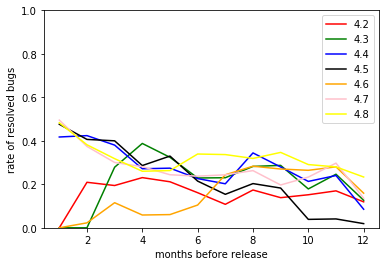

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('RQ1\\Bevol1.csv')
ci=0
colors=['red','green','blue','black','orange','pink','yellow']
for v in arr1:
# gca stands for 'get current axis'
    
    ax = plt.gca()
    value=data[data['version']==v]
    value.plot(kind='line',x='month',y='Ratio_R_A', color=colors[ci],ax=ax, label=v)
    ci=ci+1
    #df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)
plt.xlabel('months before release')
plt.ylabel('rate of resolved bugs')
plt.ylim(0,1)
#plt.title('Resolving rate of bugs in a specific version over months just after its release')
plt.savefig('rq1c.pdf')
plt.show()

In [46]:
#fixed bfore

tData=pd.DataFrame()
id_after_release=0
id_RBRB=0
id_RBFB=0
id_RBRA=0
id_RBFA=0
id_RARA=0
id_RAFA=0
c=0
for x in dict1:
    data=pd.DataFrame()
    #print(dict[x])
    start_date = dict1[x]
    end_date = Bdates[c]
    versionD= x
    version='^'+versionD
    date_time_obj = datetime.datetime.strptime(end_date, '%d-%m-%Y %H:%M:%S')
    c=c+1
    
    for i in range(12):
        
            k=date_time_obj + timedelta(30*i)
            l=date_time_obj + timedelta(30*(i+1))
           
 
            #the bug reported in this month
            mask = (df.version.str.contains(version, regex=True))  & (df['creation_ts'] >= k)  & (df['creation_ts'] < l)


            #the bug resolved in this month
            mask1 =  (df.version.str.contains(version, regex=True))  & (df['When'] >= k) & ("RESOLVED"==df['activity']) & (df['When'] <l ) & (df['creation_ts'] <= start_date) 
   
           #the bug created before release and fixed after release 
            mask2 = (df.version.str.contains(version, regex=True))  & (df['When'] >= k) & ("RESOLVED"==df['activity']) & (df['When'] <l ) & (df['creation_ts'] <= start_date) & ("FIXED"==df['resolution']) 
            #the bug created after release  and resolved
            mask3 = (df.version.str.contains(version, regex=True))  & (df['creation_ts'] >= k)  & (df['creation_ts'] < l) & ("RESOLVED"==df['activity']) & (df['When'] <l )
              #the bug created after release  and not rresolved 
           # mask7 = (df.version.str.contains(version, regex=True))  & (df['creation_ts'] >= k)  & (df['creation_ts'] < l) & ((("RESOLVED"==df['activity']) & (df['When'] >l )) |  (df['resolution'].isnull()))
   

            dff = df.loc[mask]
            dff1 = df.loc[mask1]
            dff2 = df.loc[mask2]
            #dff3 = df.loc[mask3]

           
            RAFA=len(dff2.bug_id.unique())
            RARA=len(dff1.bug_id.unique())
            
      

            if RAFA!=0 and RARA!=0:
                    ratio5=RAFA/RARA
            else:
                    ratio5=0
          
            data=pd.DataFrame({"version": [versionD] , 'RAFA':[RAFA],             
    'RARA':[RARA]
             , 'Ratio_R_B':[ratio5], "month":i+1 
   })
            
    

            tData=tData.append(data)

In [48]:
tData.to_csv('RQ1\\Bevol2.csv',index=False)

In [47]:
tData

,version,RAFA,RARA,Ratio_R_B,month
0,4.2,0,0,0.000000,1
0,4.2,3,9,0.333333,2
0,4.2,18,28,0.642857,3
0,4.2,41,54,0.759259,4
0,4.2,44,69,0.637681,5
0,4.2,48,72,0.666667,6
0,4.2,29,50,0.580000,7
0,4.2,78,101,0.772277,8
0,4.2,60,88,0.681818,9
0,4.2,83,112,0.741071,10


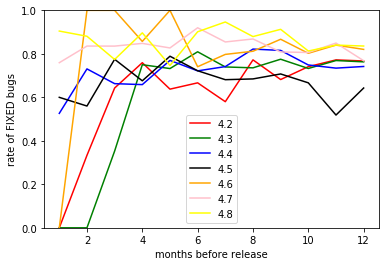

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('RQ1\\Bevol2.csv')
ci=0
colors=['red','green','blue','black','orange','pink','yellow']
for v in arr1:
# gca stands for 'get current axis'
    
    ax = plt.gca()
    value=data[data['version']==v]
    value.plot(kind='line',x='month',y='Ratio_R_B', color=colors[ci],ax=ax, label=v)
    ci=ci+1
    #df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)
plt.xlabel('months before release')
plt.ylabel('rate of FIXED bugs')
plt.ylim(0,1)
#plt.title('Resolving rate of bugs in a specific version over months just after its release')
plt.savefig('rq1d.pdf')
plt.show()